In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd #for dataframes
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# The dataset

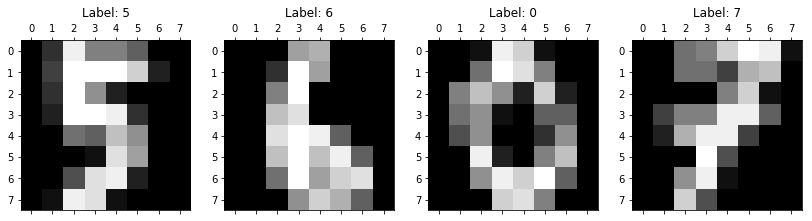

In [2]:
# load dataset
digits = datasets.load_digits()

# divide dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.15, random_state = 42)

# plot examples of handwritten digits
fig_digits, digits_plot = plt.subplots(1,4, figsize=(14,6))
plt.gray()
for i in np.arange(4):
    random_index = int(np.random.rand()*100)
    digits_plot[i].matshow(digits.images[random_index])
    digits_plot[i].set_title('Label: '+ str(digits.target[random_index]), pad = 15)
plt.savefig('digit_example.png')

## The k-Nearest-Neighbour Classifier

In [3]:
# dictionary with sets of potential hyperparameters
kn_params = {'n_neighbors': [1, 2, 3, 10, 500, 1000],
             'weights': ['uniform', 'distance']}

# cross validate hyperparameters with k = 5 folds via gridsearch
kn_grid_clf = GridSearchCV(KNeighborsClassifier(), kn_params, cv=5, return_train_score = True, iid = True)
kn_grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 10, 500, 1000], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [4]:
# save results
kn_results = pd.DataFrame(kn_grid_clf.cv_results_)
kn_best_params = kn_grid_clf.best_params_

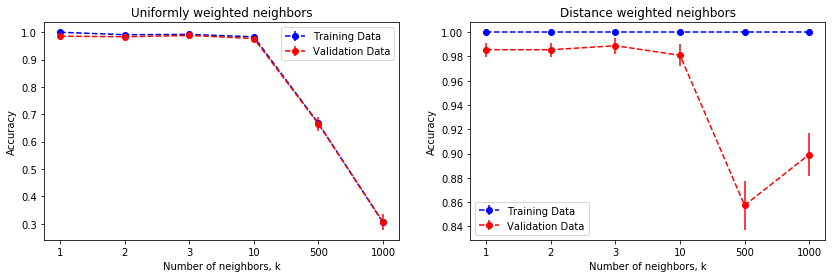

In [5]:
# visualize the results
uniform_val_means = kn_results.mean_test_score[kn_results.param_weights == 'uniform']
uniform_train_means = kn_results.mean_train_score[kn_results.param_weights == 'uniform']
uniform_val_std = kn_results.std_test_score[kn_results.param_weights == 'uniform']
uniform_train_std = kn_results.std_train_score[kn_results.param_weights == 'uniform']

distance_val_means = kn_results.mean_test_score[kn_results.param_weights == 'distance']
distance_train_means = kn_results.mean_train_score[kn_results.param_weights == 'distance']
distance_val_std = kn_results.std_test_score[kn_results.param_weights == 'distance']
distance_train_std = kn_results.std_train_score[kn_results.param_weights == 'distance']

fig, kn_plot = plt.subplots(1, 2, figsize=(14,4))
k_axis = [str(i) for i in kn_params['n_neighbors']]

kn_plot[0].errorbar(k_axis, uniform_train_means, yerr=uniform_train_std, fmt='b--o', label = 'Training Data')
kn_plot[0].errorbar(k_axis, uniform_val_means, yerr=uniform_val_std, fmt='r--o', label = 'Validation Data')
kn_plot[0].legend()
kn_plot[0].set_title('Uniformly weighted neighbors')
kn_plot[0].set_xlabel('Number of neighbors, k')
kn_plot[0].set_ylabel('Accuracy')

kn_plot[1].errorbar(k_axis, distance_train_means, yerr=distance_train_std, fmt='b--o', label = 'Training Data')
kn_plot[1].errorbar(k_axis, distance_val_means, yerr=distance_val_std, fmt='r--o', label = 'Validation Data')
kn_plot[1].legend()
kn_plot[1].set_title('Distance weighted neighbors')
kn_plot[1].set_xlabel('Number of neighbors, k')
kn_plot[1].set_ylabel('Accuracy')

plt.savefig('NearestNeighbor.png')
plt.show()

In [6]:
print('Best results were reached with the following choice of hyperparameters: ' + str(kn_best_params))
print('The average accuracy is '+ str((kn_grid_clf.best_score_*100).round(2))+'% on the validation sets.')

Best results were reached with the following choice of hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
The average accuracy is 98.89% on the validation sets.


In [7]:
# calculate score on unseen test data
#y_pred = kn_grid_clf.predict(X_test)
#print(sum(abs(y_pred-y_test) == 0)/len(y_test))

score = kn_grid_clf.score(X_test, y_test)
print('The accuracy of the ' + str(kn_best_params['n_neighbors']) + '-Nearest-Neigbour Classification with ' + str(kn_best_params['weights']) + ' weighted neighbors is ' + str((score*100).round(2)) + '% on the test data.')

The accuracy of the 3-Nearest-Neigbour Classification with distance weighted neighbors is 98.15% on the test data.


## Support Vector Machine

In [8]:
# potential hyperparameters
gamma = np.array([1, 10, 30, 50, 70, 90, 100, 1000])*(1e-5)
C = [0.01, 1, 3, 4, 5, 6, 7, 10, 100, 1000]
coef0 = [0, 1]

svm_params = [{'C': C,
             'kernel': ['linear']},
             {'C': C,
              'kernel': ['rbf'],
              'gamma': gamma},
             {'C': C,
              'kernel': ['sigmoid'],
              'gamma': gamma,
              'coef0': coef0},
             {'C': C,
              'kernel': ['poly'],
              'degree': [2, 3],
              'gamma': gamma,
              'coef0': coef0}
             ]

# cross validate hyperparameters with k = 5 folds via gridsearch
svm_grid_clf = GridSearchCV(SVC(random_state = 42), svm_params, cv=5, return_train_score = True, iid = True)
svm_grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'C': [0.01, 1, 3, 4, 5, 6, 7, 10, 100, 1000], 'kernel': ['linear']}, {'C': [0.01, 1, 3, 4, 5, 6, 7, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': array([1.e-05, 1.e-04, 3.e-04, 5.e-04, 7.e-04, 9.e-04, 1.e-03, 1.e-02])}, {'C': [0.01, 1, 3, 4, 5, 6, 7, 10, 100, 1000], 'kernel': ['sigmoid'],... 'gamma': array([1.e-05, 1.e-04, 3.e-04, 5.e-04, 7.e-04, 9.e-04, 1.e-03, 1.e-02]), 'coef0': [0, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
# save results
svm_results = pd.DataFrame(svm_grid_clf.cv_results_)
svm_best_params = svm_grid_clf.best_params_
best_gamma = svm_best_params['gamma']
best_C = svm_best_params['C']

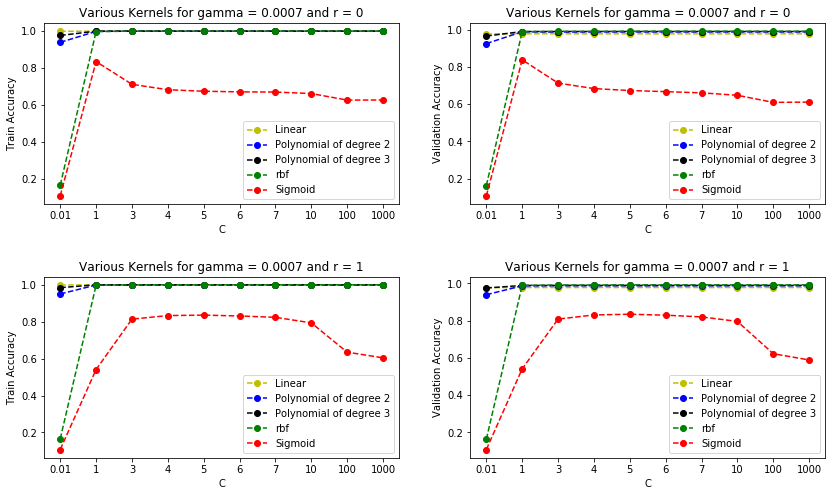

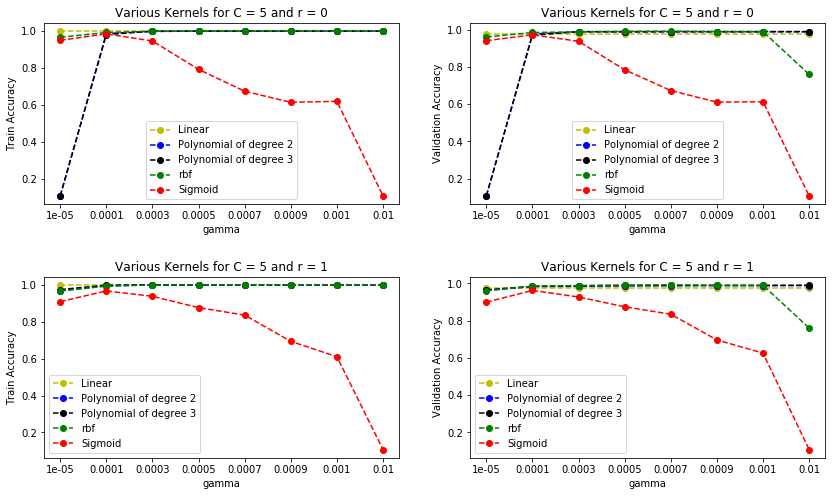

In [10]:
# visualize the results
C_axis = [str(i) for i in C]
gamma_axis = [str(i) for i in np.round(gamma,5)]

# method that provides the wanted indices of scores for plotting
def getIndicesForScores(parameters):
    index = (svm_results.param_kernel == parameters['kernel'])
    if 'C' in parameters:
        index = index & (svm_results.param_C == parameters['C'])
    if 'gamma' in parameters:
        index = index & (svm_results.param_gamma == parameters['gamma'])
    if 'coef0' in parameters:
        index = index & (svm_results.param_coef0 == parameters['coef0'])
    if 'degree' in parameters:
        index = index & (svm_results.param_degree == parameters['degree'])
    return index

# fix gamma = best_gamma, variable C
fig1, svm_plot_C = plt.subplots(2, 2, figsize=(14,8))
fig1.subplots_adjust(hspace = 0.4)
for i in np.arange(2):
    
    # train scores
    svm_plot_C[i,0].plot(C_axis, svm_results.mean_train_score[getIndicesForScores({'kernel': 'linear'})], 'y--o', label = 'Linear')
    svm_plot_C[i,0].plot(C_axis, svm_results.mean_train_score[getIndicesForScores({'kernel': 'poly', 'degree': 2, 'gamma': best_gamma, 'coef0': i})], 'b--o', label = 'Polynomial of degree 2')
    svm_plot_C[i,0].plot(C_axis, svm_results.mean_train_score[getIndicesForScores({'kernel': 'poly', 'degree': 3, 'gamma': best_gamma, 'coef0': i})], 'k--o', label = 'Polynomial of degree 3')
    svm_plot_C[i,0].plot(C_axis, svm_results.mean_train_score[getIndicesForScores({'kernel': 'rbf', 'gamma': best_gamma,})], 'g--o', label = 'rbf')
    svm_plot_C[i,0].plot(C_axis, svm_results.mean_train_score[getIndicesForScores({'kernel': 'sigmoid', 'gamma': best_gamma, 'coef0': i})], 'r--o', label = 'Sigmoid')
    svm_plot_C[i,0].legend()
    svm_plot_C[i,0].set_title('Various Kernels for gamma = ' + str(np.round(best_gamma,4)) + ' and r = ' + str(i))
    svm_plot_C[i,0].set_ylabel('Train Accuracy')
    svm_plot_C[i,0].set_xlabel('C')

    # validation scores
    svm_plot_C[i,1].plot(C_axis, svm_results.mean_test_score[getIndicesForScores({'kernel': 'linear'})], 'y--o', label = 'Linear')
    svm_plot_C[i,1].plot(C_axis, svm_results.mean_test_score[getIndicesForScores({'kernel': 'poly', 'degree': 2, 'gamma': best_gamma, 'coef0': i})], 'b--o', label = 'Polynomial of degree 2')
    svm_plot_C[i,1].plot(C_axis, svm_results.mean_test_score[getIndicesForScores({'kernel': 'poly', 'degree': 3, 'gamma': best_gamma, 'coef0': i})], 'k--o', label = 'Polynomial of degree 3')
    svm_plot_C[i,1].plot(C_axis, svm_results.mean_test_score[getIndicesForScores({'kernel': 'rbf', 'gamma': best_gamma})], 'g--o', label = 'rbf')
    svm_plot_C[i,1].plot(C_axis, svm_results.mean_test_score[getIndicesForScores({'kernel': 'sigmoid', 'gamma': best_gamma, 'coef0': i})], 'r--o', label = 'Sigmoid')
    svm_plot_C[i,1].legend()
    svm_plot_C[i,1].set_title('Various Kernels for gamma = ' + str(np.round(best_gamma,4)) + ' and r = ' + str(i))
    svm_plot_C[i,1].set_ylabel('Validation Accuracy')
    svm_plot_C[i,1].set_xlabel('C')
plt.savefig('SVM_C.png')

# fix C = best_C, variable gamma
fig2, svm_plot_gamma = plt.subplots(2, 2, figsize=(14,8))
fig2.subplots_adjust(hspace = 0.4)
for i in np.arange(2):
    
    # train scores
    svm_plot_gamma[i,0].plot(gamma_axis, np.ones([np.size(gamma_axis)])*svm_results.mean_train_score[getIndicesForScores({'C': best_C, 'kernel': 'linear'})].values, 'y--o', label = 'Linear')
    svm_plot_gamma[i,0].plot(gamma_axis, svm_results.mean_train_score[getIndicesForScores({'C': best_C, 'kernel': 'poly', 'degree': 2, 'coef0': i})], 'b--o', label = 'Polynomial of degree 2')
    svm_plot_gamma[i,0].plot(gamma_axis, svm_results.mean_train_score[getIndicesForScores({'C': best_C, 'kernel': 'poly', 'degree': 3, 'coef0': i})], 'k--o', label = 'Polynomial of degree 3')
    svm_plot_gamma[i,0].plot(gamma_axis, svm_results.mean_train_score[getIndicesForScores({'C': best_C, 'kernel': 'rbf'})], 'g--o', label = 'rbf')
    svm_plot_gamma[i,0].plot(gamma_axis, svm_results.mean_train_score[getIndicesForScores({'C': best_C, 'kernel': 'sigmoid', 'coef0': i})], 'r--o', label = 'Sigmoid')
    svm_plot_gamma[i,0].legend()
    svm_plot_gamma[i,0].set_title('Various Kernels for C = ' + str(best_C) + ' and r = ' + str(i))
    svm_plot_gamma[i,0].set_ylabel('Train Accuracy')
    svm_plot_gamma[i,0].set_xlabel('gamma')


    # validation scores
    svm_plot_gamma[i,1].plot(gamma_axis, np.ones([np.size(gamma_axis)])*svm_results.mean_test_score[getIndicesForScores({'C': best_C, 'kernel': 'linear'})].values, 'y--o', label = 'Linear')
    svm_plot_gamma[i,1].plot(gamma_axis, svm_results.mean_test_score[getIndicesForScores({'C': best_C, 'kernel': 'poly', 'degree': 2, 'coef0': i})], 'b--o', label = 'Polynomial of degree 2')
    svm_plot_gamma[i,1].plot(gamma_axis, svm_results.mean_test_score[getIndicesForScores({'C': best_C, 'kernel': 'poly', 'degree': 3, 'coef0': i})], 'k--o', label = 'Polynomial of degree 3')
    svm_plot_gamma[i,1].plot(gamma_axis, svm_results.mean_test_score[getIndicesForScores({'C': best_C, 'kernel': 'rbf'})], 'g--o', label = 'rbf')
    svm_plot_gamma[i,1].plot(gamma_axis, svm_results.mean_test_score[getIndicesForScores({'C': best_C, 'kernel': 'sigmoid', 'coef0': i})], 'r--o', label = 'Sigmoid')
    svm_plot_gamma[i,1].legend()
    svm_plot_gamma[i,1].set_title('Various Kernels for C = ' + str(best_C) + ' and r = ' + str(i))
    svm_plot_gamma[i,1].set_ylabel('Validation Accuracy')
    svm_plot_gamma[i,1].set_xlabel('gamma')
plt.savefig('SVM_gamma.png')
plt.show()

In [11]:
svm_best_params['gamma'] = np.round(svm_best_params['gamma'], 5)
print('Hyperparameters ' + str(svm_best_params) + ' lead to the best average accuracy on the validation data: ' + str((svm_grid_clf.best_score_*100).round(2)) +'%.' )

# calculate score on unseen test data
#y_pred = kn_grid_clf.predict(X_test)
#print(sum(abs(y_pred-y_test) == 0)/len(y_test))

score = svm_grid_clf.score(X_test, y_test)
print('The accuracy of the SVM-Classifier with this particular choice of hyperparameters is ' + str((score*100).round(2)) + '% on the test data.')

Hyperparameters {'C': 5, 'gamma': 0.0007, 'kernel': 'rbf'} lead to the best average accuracy on the validation data: 99.21%.
The accuracy of the SVM-Classifier with this particular choice of hyperparameters is 98.89% on the test data.


## Neural Network

In [12]:
# MLPClassifier constructor with the following self-chosen default values
nn_clf = MLPClassifier(solver = 'lbfgs', learning_rate ='constant', random_state = 42)

# set of potential hyperparameters
nn_params = {'activation': ['relu', 'logistic', 'tanh'],
            'hidden_layer_sizes': [(2), (10), (20), (2,2), (10,10), (20,20), (20,10), (10,20)],
            'alpha': np.array([1, 100, 1000, 2000, 5000])*(1e-2)
            }

# cross validate hyperparameters with k = 5 folds via gridsearch
nn_grid_clf = GridSearchCV(nn_clf, nn_params, cv = 5, return_train_score = True, iid = True)
nn_grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'activation': ['relu', 'logistic', 'tanh'], 'hidden_layer_sizes': [2, 10, 20, (2, 2), (10, 10), (20, 20), (20, 10), (10, 20)], 'alpha': array([1.e-02, 1.e+00, 1.e+01, 2.e+01, 5.e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
# save results
nn_results = pd.DataFrame(nn_grid_clf.cv_results_)
best_hls = nn_grid_clf.best_params_['hidden_layer_sizes']
best_alpha = nn_grid_clf.best_params_['alpha']

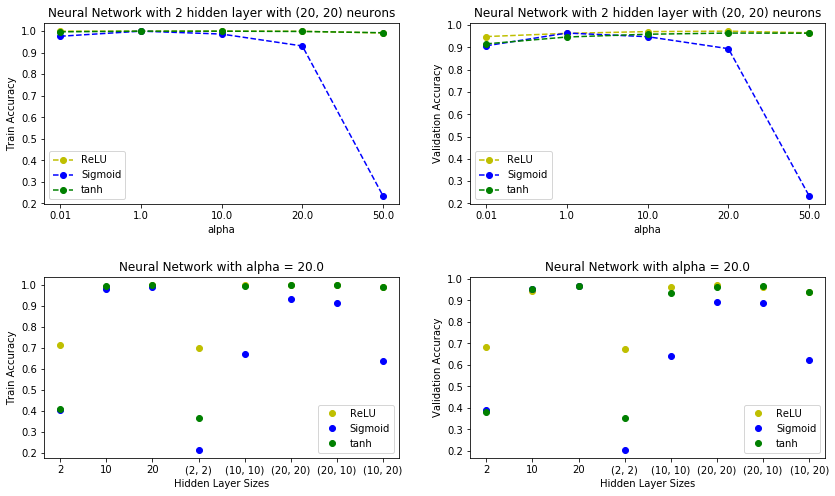

In [14]:
# x-axis
alpha_axis = [str(i) for i in nn_params['alpha']]
hls_axis = [str(i) for i in nn_params['hidden_layer_sizes']]

# method that provides the wanted indices of scores for plotting
def getIndicesForScoresNN(parameters2):
    index = (nn_results.param_activation == parameters2['activation'])
    if 'hidden_layer_sizes' in parameters2:
        index = index & (nn_results.param_hidden_layer_sizes == parameters2['hidden_layer_sizes'])
    if 'alpha' in parameters2:
        index = index & (nn_results.param_alpha == parameters2['alpha'])
    return index

# fix hls = best_hls, variable alpha

fig0, nn_plot = plt.subplots(2,2, figsize=(14,8))
fig0.subplots_adjust(hspace = 0.4)


nn_plot[0,0].plot(alpha_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'relu', 'hidden_layer_sizes': best_hls})], 'y--o', label = 'ReLU')
nn_plot[0,0].plot(alpha_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'logistic', 'hidden_layer_sizes': best_hls})], 'b--o', label = 'Sigmoid')
nn_plot[0,0].plot(alpha_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'tanh', 'hidden_layer_sizes': best_hls})], 'g--o', label = 'tanh')
nn_plot[0,0].legend()
nn_plot[0,0].set_title('Neural Network with ' + str(np.size(best_hls)) + ' hidden layer with ' + str(best_hls) + ' neurons')
nn_plot[0,0].set_xlabel('alpha')
nn_plot[0,0].set_ylabel('Train Accuracy')


nn_plot[0,1].plot(alpha_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'relu', 'hidden_layer_sizes': best_hls})], 'y--o', label = 'ReLU')
nn_plot[0,1].plot(alpha_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'logistic', 'hidden_layer_sizes': best_hls})], 'b--o', label = 'Sigmoid')
nn_plot[0,1].plot(alpha_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'tanh', 'hidden_layer_sizes': best_hls})], 'g--o', label = 'tanh')
nn_plot[0,1].legend()
nn_plot[0,1].set_title('Neural Network with ' + str(np.size(best_hls)) + ' hidden layer with ' + str(best_hls) + ' neurons')
nn_plot[0,1].set_xlabel('alpha')
nn_plot[0,1].set_ylabel('Validation Accuracy')


nn_plot[1,0].plot(hls_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'relu', 'alpha': best_alpha})], 'yo', label = 'ReLU')
nn_plot[1,0].plot(hls_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'logistic', 'alpha': best_alpha})], 'bo', label = 'Sigmoid')
nn_plot[1,0].plot(hls_axis, nn_results.mean_train_score[getIndicesForScoresNN({'activation': 'tanh', 'alpha': best_alpha})], 'go', label = 'tanh')
nn_plot[1,0].legend()
nn_plot[1,0].set_title('Neural Network with alpha = ' + str(best_alpha))
nn_plot[1,0].set_xlabel('Hidden Layer Sizes')
nn_plot[1,0].set_ylabel('Train Accuracy')


nn_plot[1,1].plot(hls_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'relu', 'alpha': best_alpha})], 'yo', label = 'ReLU')
nn_plot[1,1].plot(hls_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'logistic', 'alpha': best_alpha})], 'bo', label = 'Sigmoid')
nn_plot[1,1].plot(hls_axis, nn_results.mean_test_score[getIndicesForScoresNN({'activation': 'tanh', 'alpha': best_alpha})], 'go', label = 'tanh')
nn_plot[1,1].legend()
nn_plot[1,1].set_title('Neural Network with alpha = ' + str(best_alpha))
nn_plot[1,1].set_xlabel('Hidden Layer Sizes')
nn_plot[1,1].set_ylabel('Validation Accuracy')
plt.savefig('NeuralNetwork.png')
plt.show()

In [15]:
print('Hyperparameters ' + str(nn_grid_clf.best_params_) + ' lead to the best average accuracy on the validation data: ' + str((nn_grid_clf.best_score_*100).round(2)) +'%.' )

# calculate score on unseen test data
#y_pred = kn_grid_clf.predict(X_test)
#print(sum(abs(y_pred-y_test) == 0)/len(y_test))

score = nn_grid_clf.score(X_test, y_test)
print('The accuracy of the Neural Network classification with the particular choice of hyperparameters is ' + str((score*100).round(2)) + '% on the test data.')

Hyperparameters {'activation': 'relu', 'alpha': 20.0, 'hidden_layer_sizes': (20, 20)} lead to the best average accuracy on the validation data: 97.25%.
The accuracy of the Neural Network classification with the particular choice of hyperparameters is 96.3% on the test data.
